In [1]:
import cv2
import math
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import csv



In [2]:
import os
import gc
import re


In [3]:
IMAGE_PATH = "/home/antreas/Desktop/Kaggle/Plant_pathology/Dataset/images/"
TEST_PATH = "/home/antreas/Desktop/Kaggle/Plant_pathology/Dataset/test.csv"
TRAIN_PATH = "/home/antreas/Desktop/Kaggle/Plant_pathology/Dataset/train.csv"
SUB_PATH = "/home/antreas/Desktop/Kaggle/Plant_pathology/Dataset/sample_submission.csv"

sub = pd.read_csv(SUB_PATH)
test_data = pd.read_csv(TEST_PATH)
train_data = pd.read_csv(TRAIN_PATH)

In [4]:
train_data.shape

(1821, 5)

In [5]:
train_data.shape

(1821, 5)

In [6]:
def load_image(image_id):
    file_path = image_id + ".jpg"
    image = cv2.imread(IMAGE_PATH + file_path)
    res=cv2.resize(image, (250,250))
    return cv2.cvtColor(res, cv2.COLOR_BGR2RGB)


In [7]:
x = load_image("Test_0")

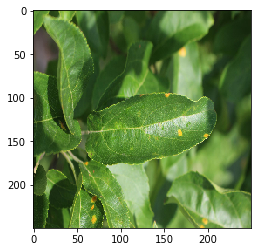

In [8]:
plt.imshow(x)

In [9]:
train_im =[]
for i in range(1821):
    idi="Test_"+str(i)
    train_im.append(load_image(idi))
    
     
    

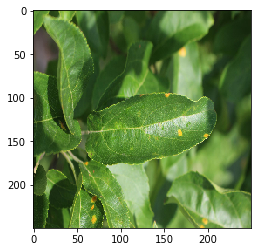

In [10]:
plt.imshow(train_im[0])

In [11]:
train_im = np.array(train_im)

In [12]:
train_im.shape

(1821, 250, 250, 3)

In [13]:
def get_data(filename):
    with open(filename) as training_file:
        csv_reader = csv.reader(training_file, delimiter=',')
        first_line = True
        temp_labels = []
        for row in csv_reader:
            if first_line:
                first_line = False
            else:
                temp_labels.append(row[1:])
        labels = np.array(temp_labels).astype('float')
    return labels

In [14]:
train_lab=get_data(TRAIN_PATH)

In [15]:
train_lab.shape

(1821, 4)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_val, y_train, y_val = train_test_split(train_im, train_lab, test_size=0.2, random_state=42)

In [18]:
y_val.shape

(365, 4)

In [19]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    # Your Code Here
    )

validation_datagen = ImageDataGenerator(rescale=1. / 255)

In [21]:
from tensorflow.keras.applications import DenseNet121

In [22]:
model = tf.keras.models.Sequential([DenseNet121(input_shape=(250, 250, 3), 
                                                weights='imagenet',include_top=False),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)]
    # Your Code Here
    )

# Compile Model. 
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 7, 7, 1024)        7037504   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 4100      
Total params: 7,041,604
Trainable params: 6,957,956
Non-trainable params: 83,648
_________________________________________________________________


In [24]:
history = model.fit_generator(train_datagen.flow(X_train, y_train),
                              steps_per_epoch=X_train.shape[0],
                              epochs=3,
                              validation_data=validation_datagen.flow(X_val, y_val)
                             )

Epoch 1/3


ResourceExhaustedError: OOM when allocating tensor with shape[32,15,15,992] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:FusedBatchNormV3]

In [ ]:
X_train.shape[0]